<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/ordinals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


## Data

In [4]:
# Each questions is represented by a separate column.
df = pd.read_csv('/content/generosity.csv')
df.head()

,experience,faith,cause,values
0,not at all,not at all,not at all,not at all
1,not at all,not at all,not at all,not at all
2,not at all,not at all,not at all,not at all
3,not at all,not at all,not at all,a little
4,not at all,not at all,not at all,a little


## Preprocessing

In [5]:
# Melt all columns into a single variable.
df = df.melt(var_name='motivation', value_name='rating')
# Set dtypes.
df['motivation'] = df['motivation'].astype('category')
rating_levels = ['not at all', 'a little', 'neutral', 'strongly', 'very strongly']
df['rating'] = df['rating'].astype(
    pd.CategoricalDtype(categories=rating_levels, ordered=True))
df.head(10)

,motivation,rating
0,experience,not at all
1,experience,not at all
2,experience,not at all
3,experience,not at all
4,experience,not at all
5,experience,not at all
6,experience,not at all
7,experience,not at all
8,experience,a little
9,experience,a little


## Tabulate

In [6]:
# Create a normalised table (sum to 100% across rows).
table = pd.crosstab(df['motivation'], df['rating'],
                    normalize='index') * 100
# Sort by highest value.
table.sort_values(by='very strongly', inplace=True)
table.round(2)

rating,not at all,a little,neutral,strongly,very strongly
motivation,,,,,
faith,45.95,21.62,18.92,8.11,5.41
experience,21.62,32.43,18.92,18.92,8.11
cause,16.22,18.92,21.62,24.32,18.92
values,8.11,18.92,21.62,24.32,27.03


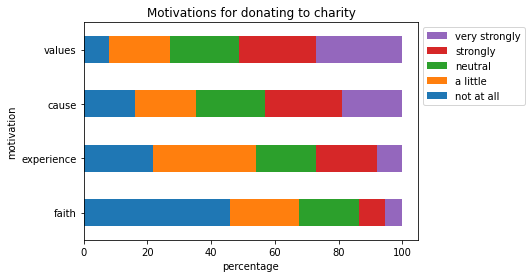

In [7]:
ax = table.plot.barh(stacked=True)

# Manually draw legend: reverse order of labels and plot outside axes.
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.0, 1.0))

ax.set_xlabel('percentage')
ax.set_title('Motivations for donating to charity')

plt.show()

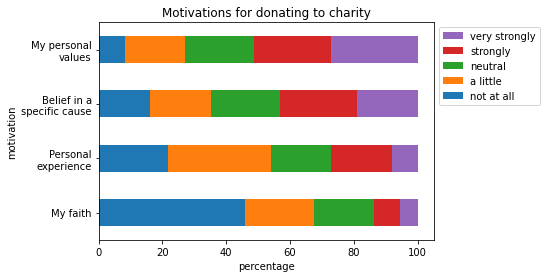

In [8]:
from textwrap import wrap

ax = table.plot.barh(stacked=True)
# Manually draw legend: reverse order of labels and plot outside axes.
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('percentage')
ax.set_title('Motivations for donating to charity')

# Better y-axis labels.
motivations = {'experience': 'Personal experience',
               'faith': 'My faith',
               'cause': 'Belief in a specific cause',
               'values': 'My personal values'}
# Use textwrap library to break long lines automatically.
motivations = {k: '\n'.join(wrap(v, 17)) for k, v in motivations.items()}
# Replace original y-axis labels.
ax.set_yticklabels(table.index.map(motivations))
plt.show()

## Heat map

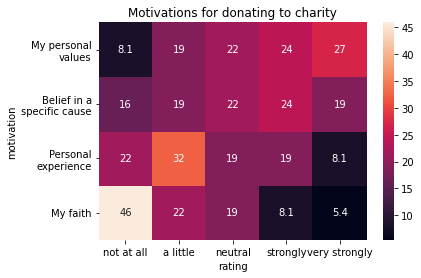

In [9]:
ax = sns.heatmap(table, annot=True)
ax.set_title('Motivations for donating to charity')

# Better y-axis labels.
motivations = {'experience': 'Personal experience',
               'faith': 'My faith',
               'cause': 'Belief in a specific cause',
               'values': 'My personal values'}

# Use textwrap library to break long lines automatically.
motivations = {k: '\n'.join(wrap(v, 17)) for k, v in motivations.items()}
# Replace original y-axis labels.
ax.set_yticklabels(table.index.map(motivations))
# Invert y-axis so most highly rated is at the top.
ax.invert_yaxis()
plt.show()

## Diverging stacked bar chart / Likert plot

In [12]:
!pip install pylikert_plot

  Created wheel for pylikert-plot: filename=pylikert_plot-0.0.1-cp36-none-any.whl size=3491 sha256=41ac97c287adaf002bfdd1b4ca5111b1d3bd5e3e3b71ccf61ced61291c4e6129
  Stored in directory: /root/.cache/pip/wheels/4d/4f/68/e36460fa543b1c8a574d8aaa8ba6a5584b22c3619814abaf11
  Created wheel for mpl-format: filename=mpl_format-0.288-cp36-none-any.whl size=51023 sha256=dab000022032bb30f8d74af67b23b99271a7d7a00f0ac6f5ba429f9b0efa97b0
  Stored in directory: /root/.cache/pip/wheels/e6/2f/b3/13e87e7dab724c1db650989424c576599441e5f623679b2d7d
  Created wheel for compound-types: filename=compound_types-0.0.5-cp36-none-any.whl size=4252 sha256=3b6c7740de62963c8e4e599696290f8be3d57d04eaffd6f3165eadc918fd9bb8
  Stored in directory: /root/.cache/pip/wheels/65/1b/b8/053e6d7e418c1242d91a82b5a8d34113747079e3c1aa899ef5
Successfully built pylikert-plot mpl-format compound-types


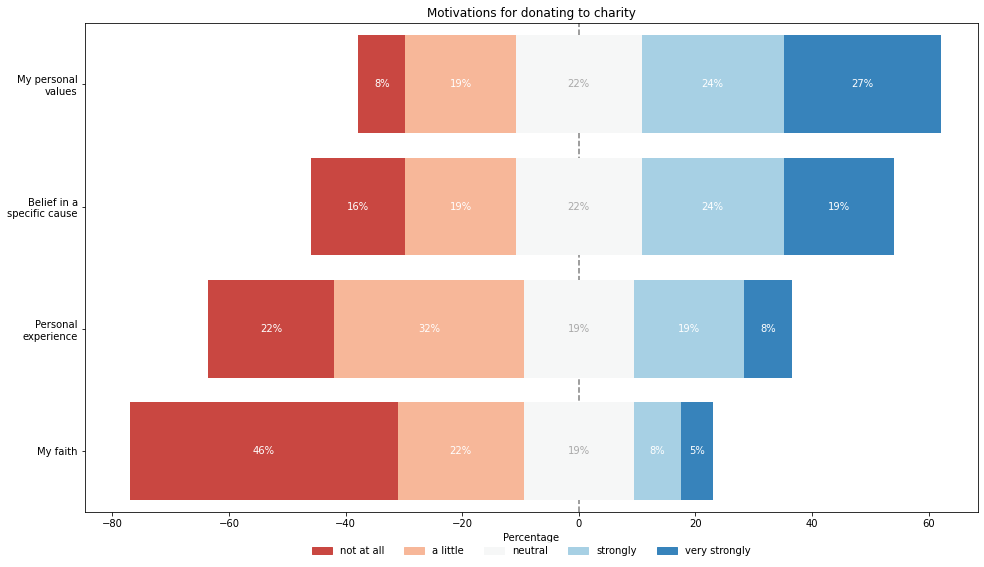

In [13]:
import likert_plot

# Better y-axis labels.
motivations = {'experience': 'Personal experience',
               'faith': 'My faith',
               'cause': 'Belief in a specific cause',
               'values': 'My personal values'}

# Use textwrap library to break long lines automatically.
motivations = {k: '\n'.join(wrap(v, 17)) for k, v in motivations.items()}

ax = likert_plot.plot_likert_scales(table, 'neutral',
                                    qname_mapping=motivations)
ax.set_title('Motivations for donating to charity')
ax.set_ylim(1, 5)               # Manually correct y-axis.
ax.invert_yaxis()
ax.set_xlabel('Percentage')
plt.show()